In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ["sex","Length","Diameter","height","whole weight","shucked weight","viscera weight","shell weight","rings"]
df = pd.read_csv("abalone.data",header=None,names=cols)
df.shape

(4177, 9)

In [3]:
df.head()

,sex,Length,Diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


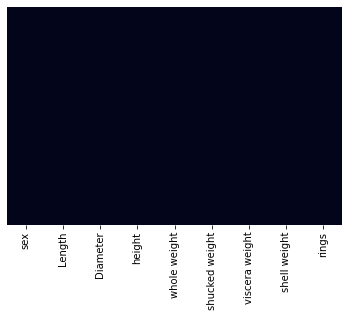

In [5]:
sns.heatmap(df.isna() , yticklabels=False,cbar=False)
plt.show()

In [6]:
df.describe()

,Length,Diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


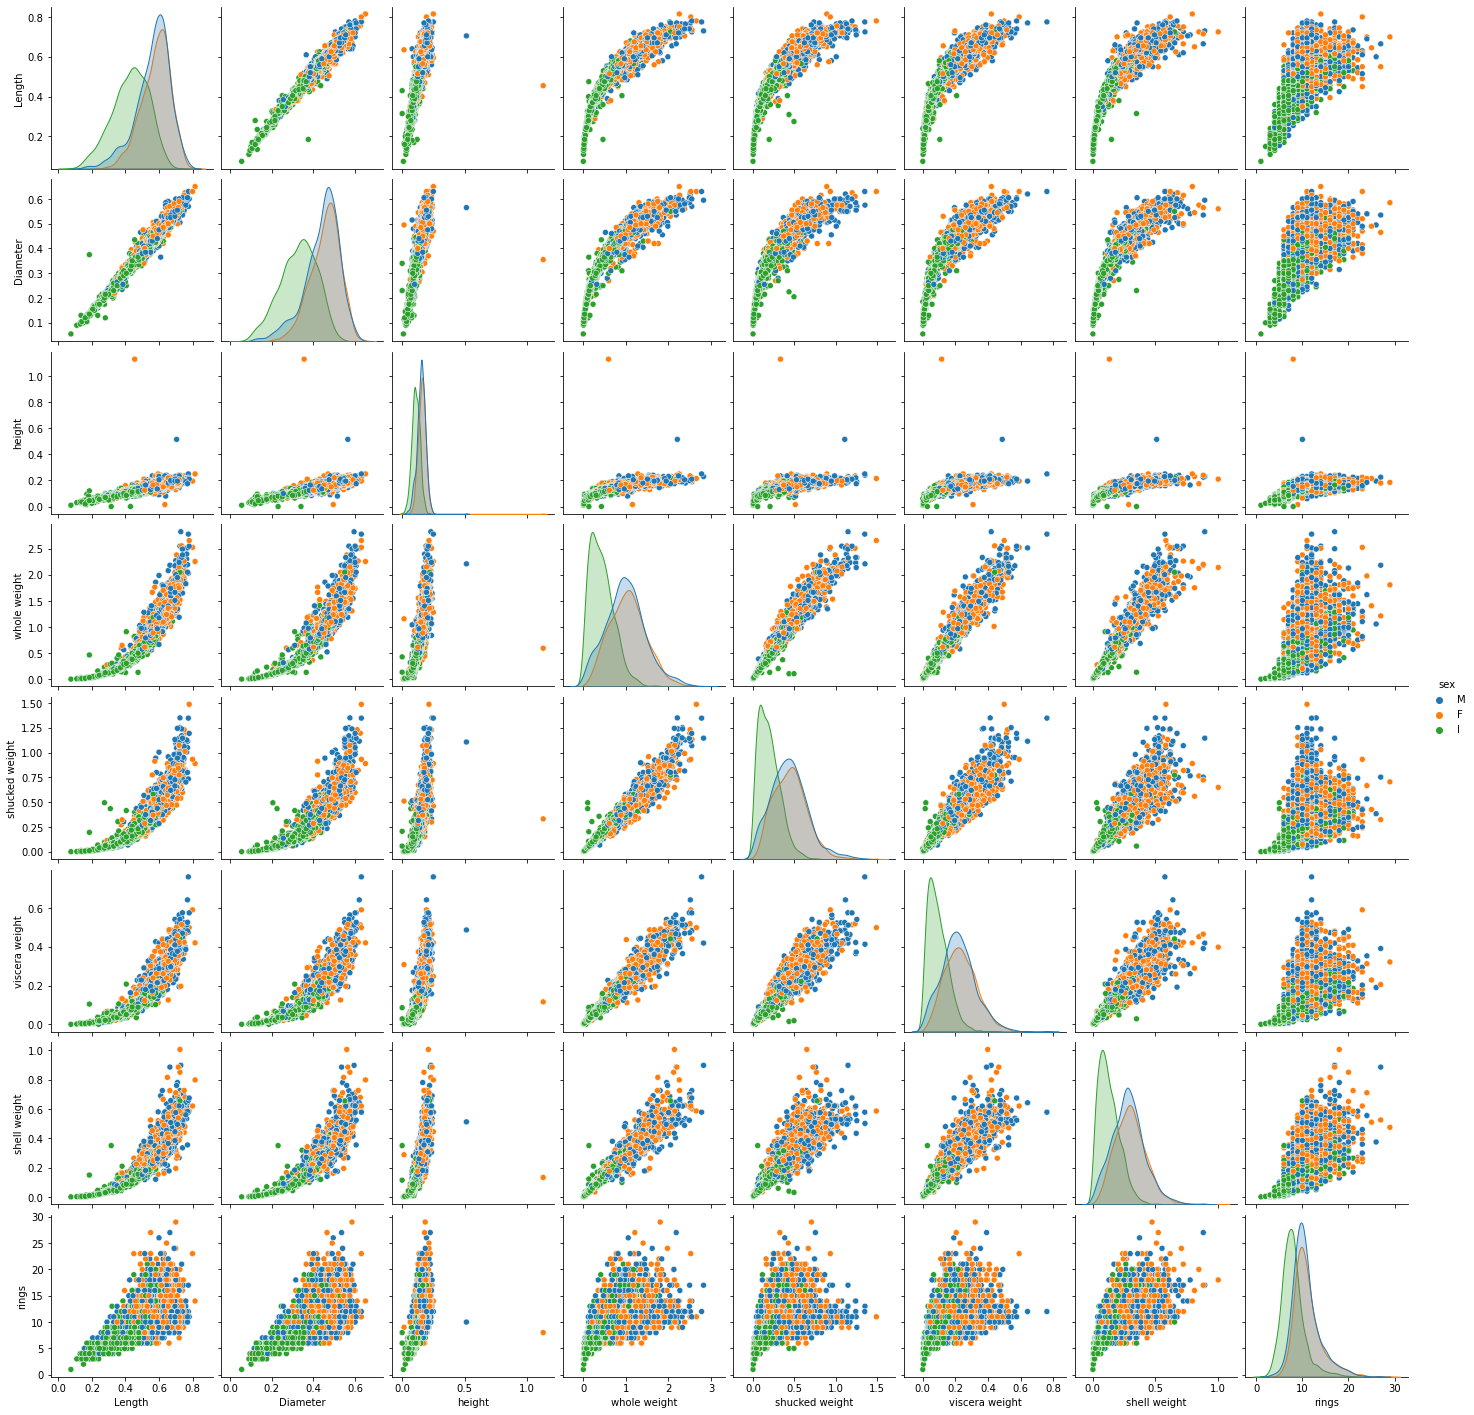

In [7]:
sns.pairplot(df , hue="sex")

In [8]:
def boxlpot(col_name):
    df.boxplot(col_name)
    return col_name

['Diameter']

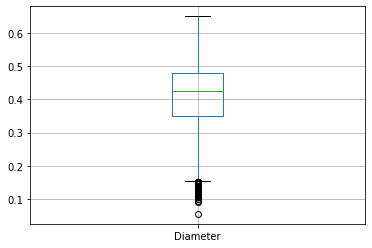

In [9]:
boxlpot(["Diameter"])

['shell weight']

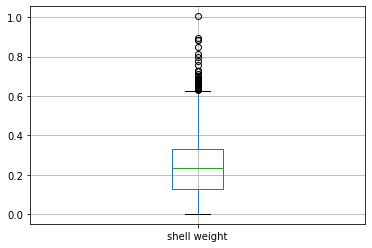

In [10]:
boxlpot(["shell weight"])

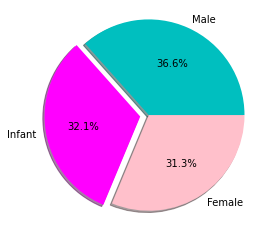

In [11]:
plt.pie(df["sex"].value_counts(),
        labels = ["Male" , "Infant","Female"],
        colors= ["c" , "magenta" , "pink"],
        shadow=True,
       autopct="%.1f%%",
       radius=1.1,
       explode=(0,0.1,0))
plt.show()

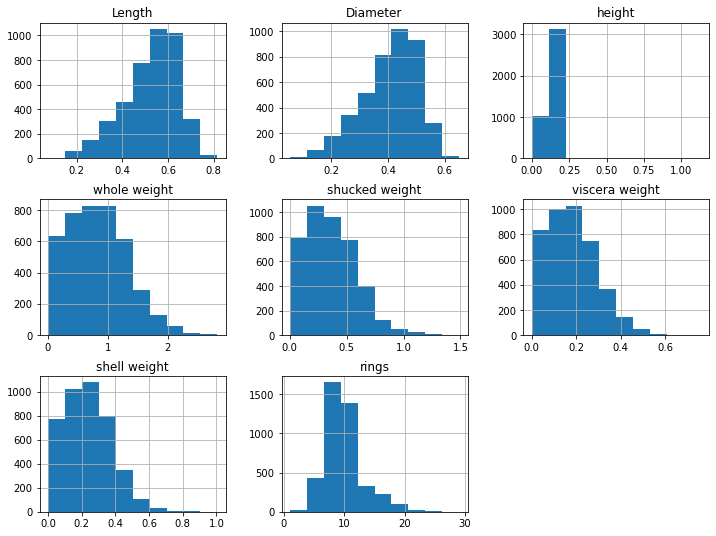

In [12]:
df.hist(figsize=(12,9))
plt.show()

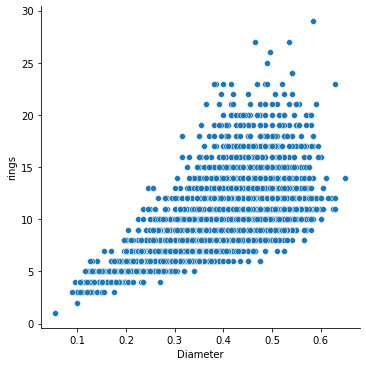

In [13]:
sns.relplot(df["Diameter"] , df["rings"] )
plt.show()

In [14]:
df.head()

,sex,Length,Diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
x = df[["Diameter" , "rings"]]

In [16]:
from sklearn.cluster import KMeans

wcss = []
n = list(range(1,11))
for i in n:
    kmeans = KMeans(n_clusters=i , random_state=1)
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[43451.758145223874,
 17587.605576884172,
 8949.598725618713,
 5423.171852391565,
 3521.2502698447006,
 2531.617459274789,
 1876.6346717956355,
 1494.335633644854,
 1199.6911337683498,
 896.1827486211303]

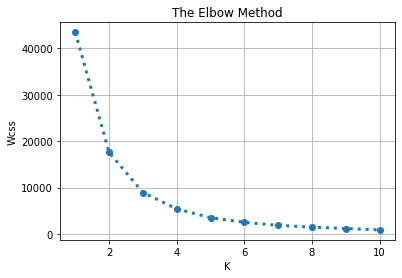

In [18]:
plt.plot(n,wcss,ls=":",lw=3,marker="o")
plt.xlabel("K")
plt.ylabel("Wcss")
plt.title("The Elbow Method")
plt.grid()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3 , random_state=1)
ypred = kmeans.fit_predict(x)

In [20]:
df.drop("sex",axis=1,inplace=True)

In [21]:
df["clusters"] = ypred

In [22]:
df.head(2)

,Length,Diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,clusters
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,1


In [23]:
kmeans.cluster_centers_

array([[ 0.44874342, 10.4127193 ],
       [ 0.32127576,  6.88415068],
       [ 0.46642857, 16.46122449]])

In [24]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

In [25]:
def scatter(col_name1 , col_name2):
    plt.scatter(df1[col_name1] , df1[col_name2] , s=80 , c="red" , label="Cluster 1")
    plt.scatter(df2[col_name1] , df2[col_name2] , s=80 , c="c" , label="Cluster 2")
    plt.scatter(df3[col_name1] , df3[col_name2] , s=80 , c="magenta" , label="Cluster 3")

    plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=120 , marker="*" , c="blue")
    
    sns.set_style("whitegrid")
    plt.xlabel(col_name1)
    plt.ylabel(col_name2)
    plt.legend()
    plt.show()
    return col_name1 , col_name2

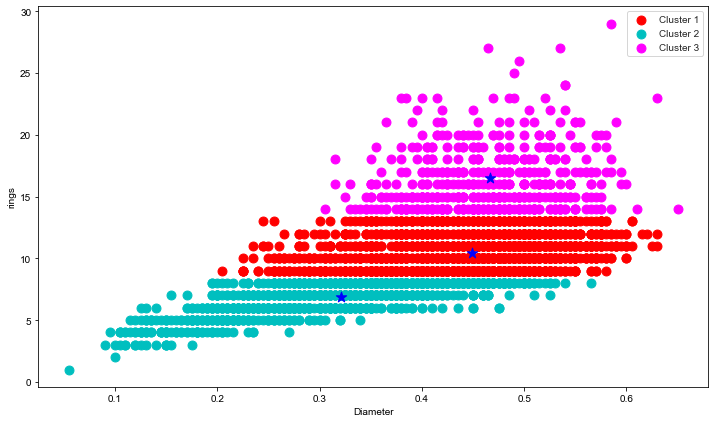

('Diameter', 'rings')

In [26]:
plt.figure(figsize=(12,7))
scatter("Diameter" , "rings")

In [27]:
y = df["clusters"]

In [28]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.svm import SVC
svm = SVC()


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [30]:
def classifiers(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    
    
    print(f"{confusion_matrix(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")
    return model

In [31]:
classifiers(knn)

[[579   0   0]
 [  0 346   0]
 [  0   0 120]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       579
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       120

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



KNeighborsClassifier(n_neighbors=3)

In [32]:
classifiers(lr)

[[579   0   0]
 [  0 346   0]
 [  0   0 120]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       579
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       120

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



LogisticRegression()

In [33]:
classifiers(svm)

[[579   0   0]
 [  0 346   0]
 [  0   0 120]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       579
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       120

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



SVC()